# A study of predicting credit risk
---
How likely a person cannot pay their loan

## Lesson plan

* Review last lesson
* Review DataExtractor class, where we stopped
* Create a few more child classes from DataExtractor for different columns
* Visualize cleaned data with matplot, numpy
* Introduction to SVM: support vector machine
* SVM in action
* [Optional] explore more columns to improve accuracy

## Step 4: data cleaning
* The purposes of loans are different in rejected data and accepted data
* We need to manually correct them

In [1]:
# Create a class to extract a column of data
# Put all the functions we created into a class


class DataExtractor(object):
    def __init__(self,data_category,column_name):
        
        header_file='header-'+data_category+'.csv'
        data_file=data_category+'.csv'
        
        '''
        if data_category=='A':
            header_file='header-A.csv'
            data_file='A.csv'
        elif data_category =='R':
            header_file='header-R.csv'
            data_file='R.csv'
        '''
        
        headers=open(header_file).read().split(',')
        index=headers.index(column_name)
            
        self.data=[]
        for line in open(data_file):
            entry=line.split(',')[index]
            cleaned_entry=self.clean(entry)
            self.data.append(cleaned_entry)
    
    def clean(self,entry):
        # Not doing anything for generic column
        return entry
            
    def stats(self):
        counter={}
        for entry in self.data:
            counter.setdefault(entry,0)
            counter[entry]=counter[entry]+1

        for entry in counter:
            counter[entry]='%.2f' % (counter[entry]*100.0/len(self.data))
        
        return counter
        
accepted_purpose=DataExtractor('A','purpose')
accepted_purpose.stats()
        

{'debt_consolidation': '52.30',
 'home_improvement': '6.20',
 'credit_card': '26.70',
 'small_business': '2.50',
 'other': '6.80',
 'car': '0.90',
 'major_purchase': '1.90',
 '': '0.50',
 'vacation': '0.60',
 'house': '0.30',
 'medical': '0.80',
 'moving': '0.50'}


---
### Create a child class to clean purpose column


In [ ]:
# TODO
# create a class inherits from DataExtractor
# overwrite the clean function to do the actual cleaning


class PurposeExtractor(DataExtractor):
    
    def clean(self,entry):
        # How can we replace wrong/bad data with good ones?
        # A big if else? 
        # Is there a better way?
        
        
        return entry
        
ap=PurposeExtractor('A','purpose')
rp=PurposeExtractor('R','purpose')

# Print out the unique values of purposes

# How about sort the values so it is easier to compare




### Extract some numbers

Machine learning is more efficient with numeric data, especially in 0-1. We will create A extractor classes to produce numbers, to extract columns like `loan_amnt`, `debt_ratio` and `credit_score`.

The `emp_length` column is also useful. However it is stored as string. We also need convert them to numbers. 

In [ ]:
class NumberExtractor(DataExtractor):
    def clean(self,entry):
        # We will keep working on this clean function
        # convert `entry` from str into float
        
class EmploymentExtractor(DataExtractor):
    def clean(self,entry):
        
        # Convert the value from string(text) into a number
        
        return entry
        
    
emp_a=EmploymentExtractor('A','emp_length')
# print(emp_a.stats())
emp_r=EmploymentExtractor('R','emp_length')
# print(emp_r.stats())

amnt_a=NumberExtractor('R','loan_amnt')
# print(amnt_a.stats())


### Step 5: Visualization

Now we have gotten some data, but it is hard to read
Let's visualize them in a scatter plot

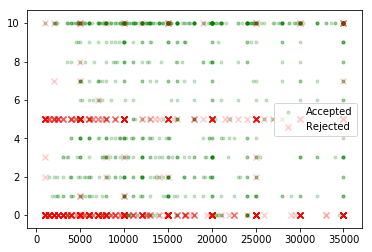

In [73]:
import matplotlib.pyplot as plt  

import numpy as np     


def exclude_empty(X,Y):
    
    filtered_x=[]
    filtered_y=[]
    
    
    for index in range(0,len(X)):
        x=X[index]
        y=Y[index]
        
        
        # both x, y need to be valid
        # ignore those empty entries
        
        if x is None or y is None:
            continue
        
        # We notice there are a few entries with very high loan values
        # The are called the outliers, let's manually remove them 
        
        elif x>39000 or y>39000:
            continue
        else:
            filtered_x.append(x)
            filtered_y.append(y)
            
    # CHALLENGE
    # use zip() function to simplify this loop
    # https://www.programiz.com/python-programming/methods/built-in/zip
    
    return filtered_x, filtered_y

emp_a=EmploymentExtractor('A','emp_length')
amnt_a=NumberExtractor('A','loan_amnt')


emp_r=EmploymentExtractor('R','emp_length')
amnt_r=NumberExtractor('R','loan_amnt')



X1,Y1=exclude_empty(amnt_a.data,emp_a.data)
X2,Y2=exclude_empty(amnt_r.data,emp_r.data)

plt.scatter(X1, Y1, label="Accepted",marker='.',alpha=0.2,color='g')
plt.scatter(X2, Y2, label="Rejected",marker='x',alpha=0.2,color='r')
plt.legend()
plt.show()

### Step 6: Some machine learning, finally

SVM: Support Vector Machine 
<img src="https://eight2late.files.wordpress.com/2016/12/svm-fig-1.png?w=700" style="float:right">


If we can draw a line to separate the rejected entries from the accepted entries, that line will help us to decide if a new loan should be approved or rejected. 

Based on our graph, we can see it is not possible. However, let's see how good we can get.

[Source](http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)

Accuracy 88.8252148997%


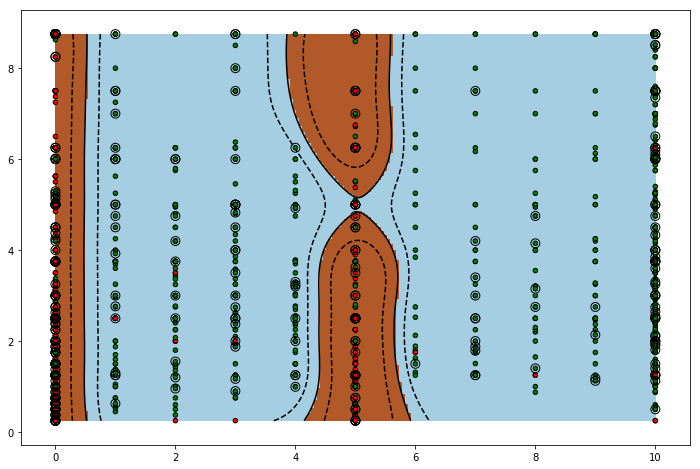

In [71]:
from sklearn import svm


emp_a = EmploymentExtractor('A', 'emp_length')
amnt_a = NumberExtractor('A', 'loan_amnt')


emp_r = EmploymentExtractor('R', 'emp_length')
amnt_r = NumberExtractor('R', 'loan_amnt')


# Preparing the data and groups for SVM
# we are building something like this
# data=  [apple, kale, banana, kale]
# groups=[fruit, veg,  fruit,  veg]

ae, aa = exclude_empty(emp_a.data, amnt_a.data)
re, ra = exclude_empty(emp_r.data, amnt_r.data)

groups = []
data = []

# alternate the data, 1 approved and 1 rejected
for index in range(0, len(ae)):
    data.append([ae[index], aa[index]/4000])
    data.append([re[index], ra[index]/4000])
    # set the group to green and red, and use it to indicate data in graph
    groups.append('g')
    groups.append('r')

# convert list to np array
data = np.array(data)
colors = np.array(groups)

# we take the first 80% entries as training data using list slicing method [start:end]
training_sample_size = int(len(data)*0.8)

training_data = data[:training_sample_size]
training_groups = colors[:training_sample_size]
test_data = data[training_sample_size:]
test_groups = colors[training_sample_size:]

# there are other kernels you can try, 'poly','linear'
# try change max_iter to see the impact
# clf means classifier
clf = svm.SVC(kernel='rbf', max_iter=500)
clf.fit(training_data, training_groups)

plt.figure(0, figsize=(12, 8))

plt.scatter(data[:, 0], data[:, 1], c=colors, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)

# Circle out the test data
plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none', zorder=10, edgecolor='k')


# Some preparation of drawing the separation lines
# Do not need to understand
x_min = data[:, 0].min()
x_max = data[:, 0].max()
y_min = data[:, 1].min()
y_max = data[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

# Prediction with trained classifier
predicted_result = clf.predict(test_data)


correct_counter = 0
for index, result in enumerate(predicted_result):
    if result == test_groups[index]:
        correct_counter += 1
print('Accuracy {}%'.format(correct_counter*100.0/len(test_data)))
plt.show()


### `OPTIONAL` 3D graph


In [ ]:
# Create a new pupose extractor
# convert all cases of purposes into a number ranging form 0 to 12
class PurposeNumExtractor(PurposeExtractor):
    def clean(self,entry):
        # We can call the parent class's function
        cleaned_entry=super(PurposeNumExtractor,self).clean(entry)
        # Now convert text to number
        return 0


import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
import numpy as np     

def exclude_empty_3(X,Y,Z):
   # Your code here
    return X,Y,Z

emp_a=EmploymentExtractor('A','emp_length')
amnt_a=NumberExtractor('A','loan_amnt')
purpose_a=PurposeNumExtractor('A','purpose')

emp_r=EmploymentExtractor('R','emp_length')
amnt_r=NumberExtractor('R','loan_amnt')
purpose_r=PurposeNumExtractor('R','purpose')


X1,Y1, Z1=exclude_empty_3(amnt_a.data,emp_a.data,purpose_a.data)
X2,Y2, Z2=exclude_empty_3(amnt_r.data,emp_r.data,purpose_r.data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X1, Y1, Z1, label="Accepted",marker='^',c='g')
ax.scatter(X2, Y2, Z2, label="Rejected",marker='o',c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

## How about using 3 parameters in SVM?